In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris_data = load_iris()

df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

df['target'] = iris_data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [4]:
print(f'Total Missing Values: \n{df.isna().sum()}')

Total Missing Values: 
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


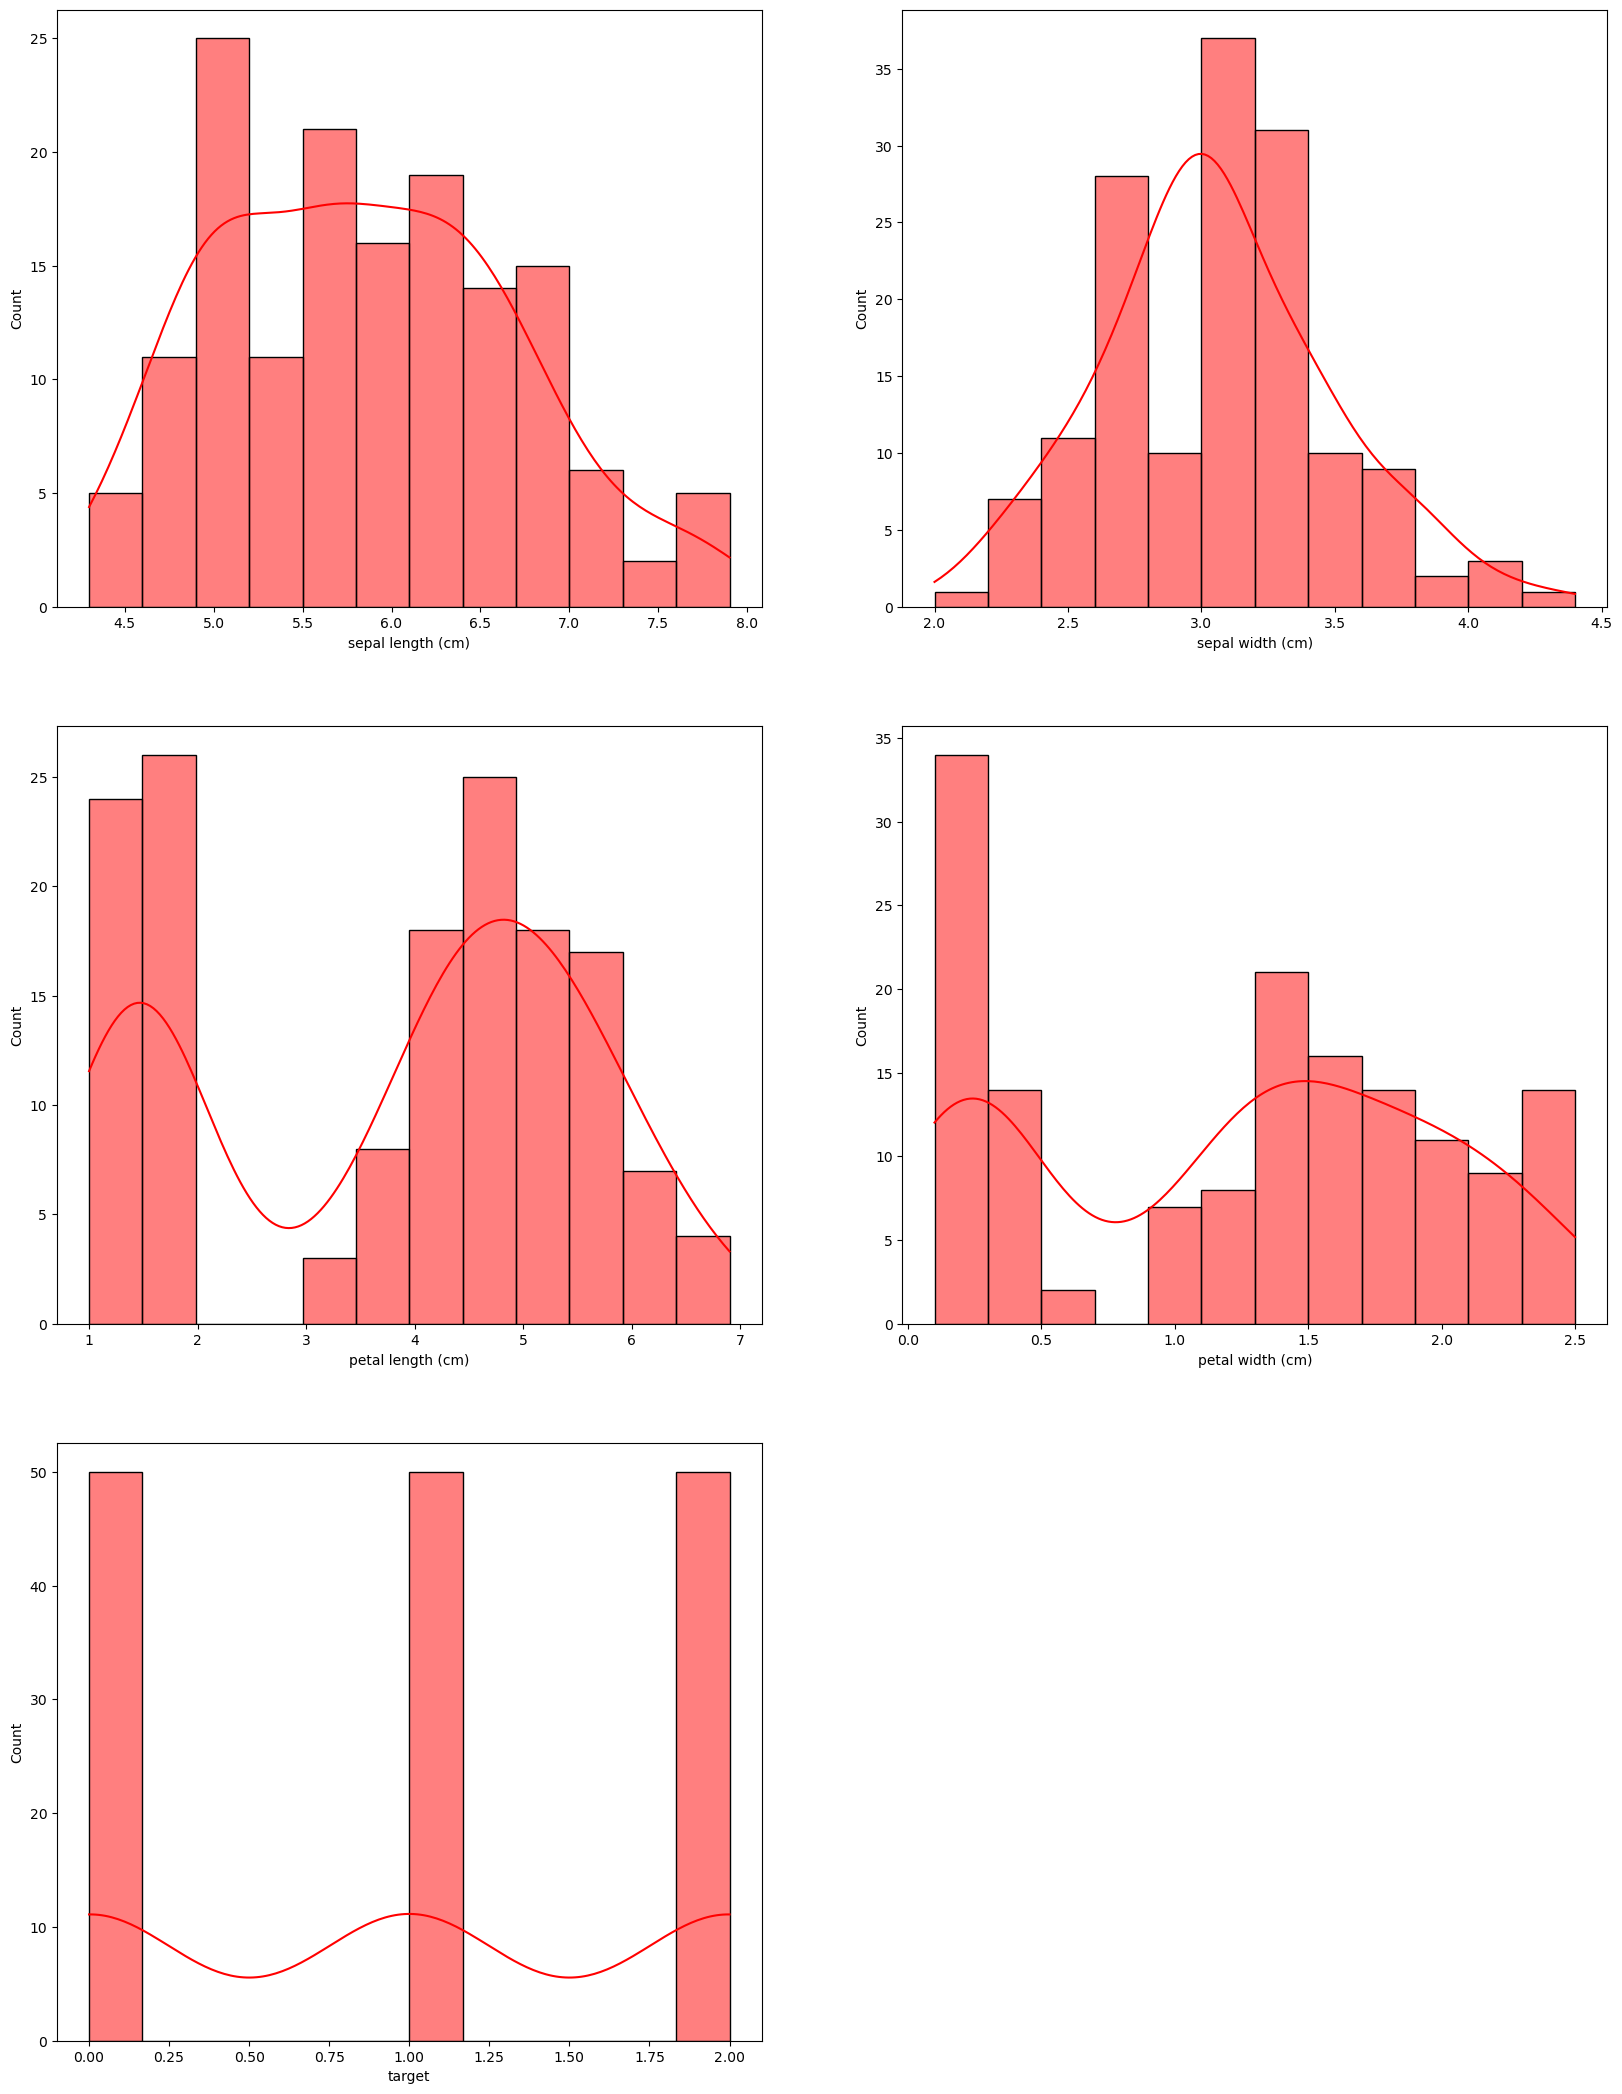

In [5]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = round(np.sqrt(len(df))), color = 'r')
plt.show()

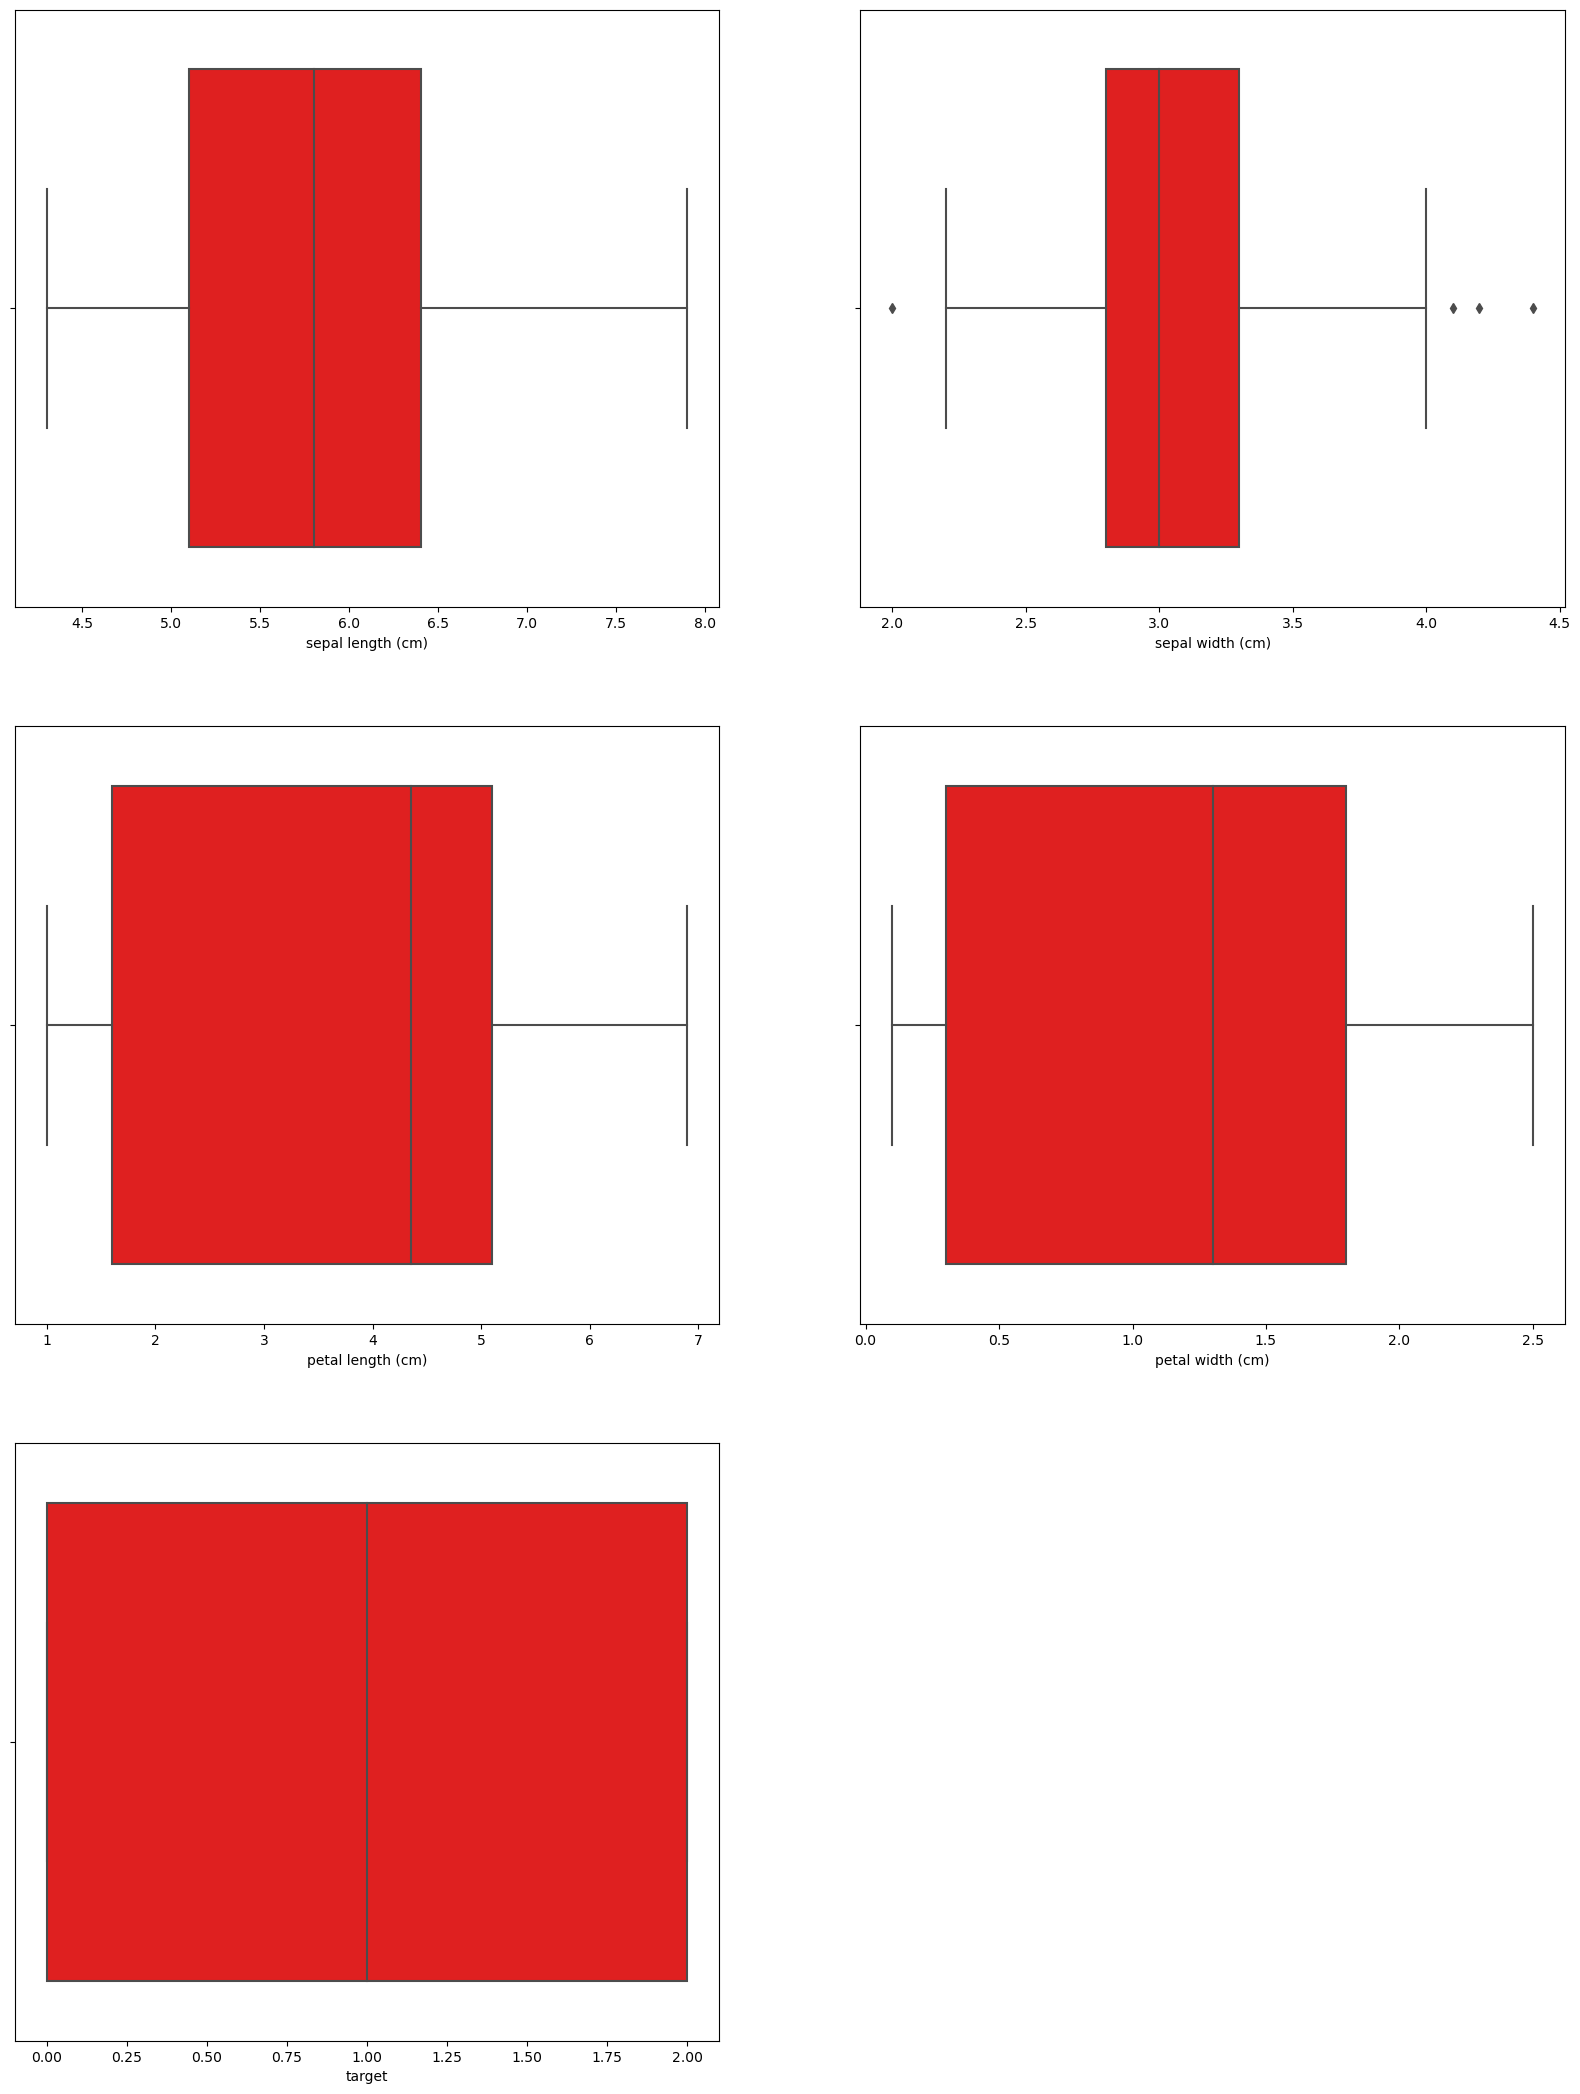

In [6]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = df, x = col, color = 'r')
plt.show()

In [7]:
df.shape

(150, 5)

In [8]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

z_scores = zscore(df)
outliers = (np.abs(z_scores)>3)
outliers.sum()

sepal length (cm)    0
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
winsored_df = df.apply(lambda x: winsorize(x, limits = 0.05))
winsored_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


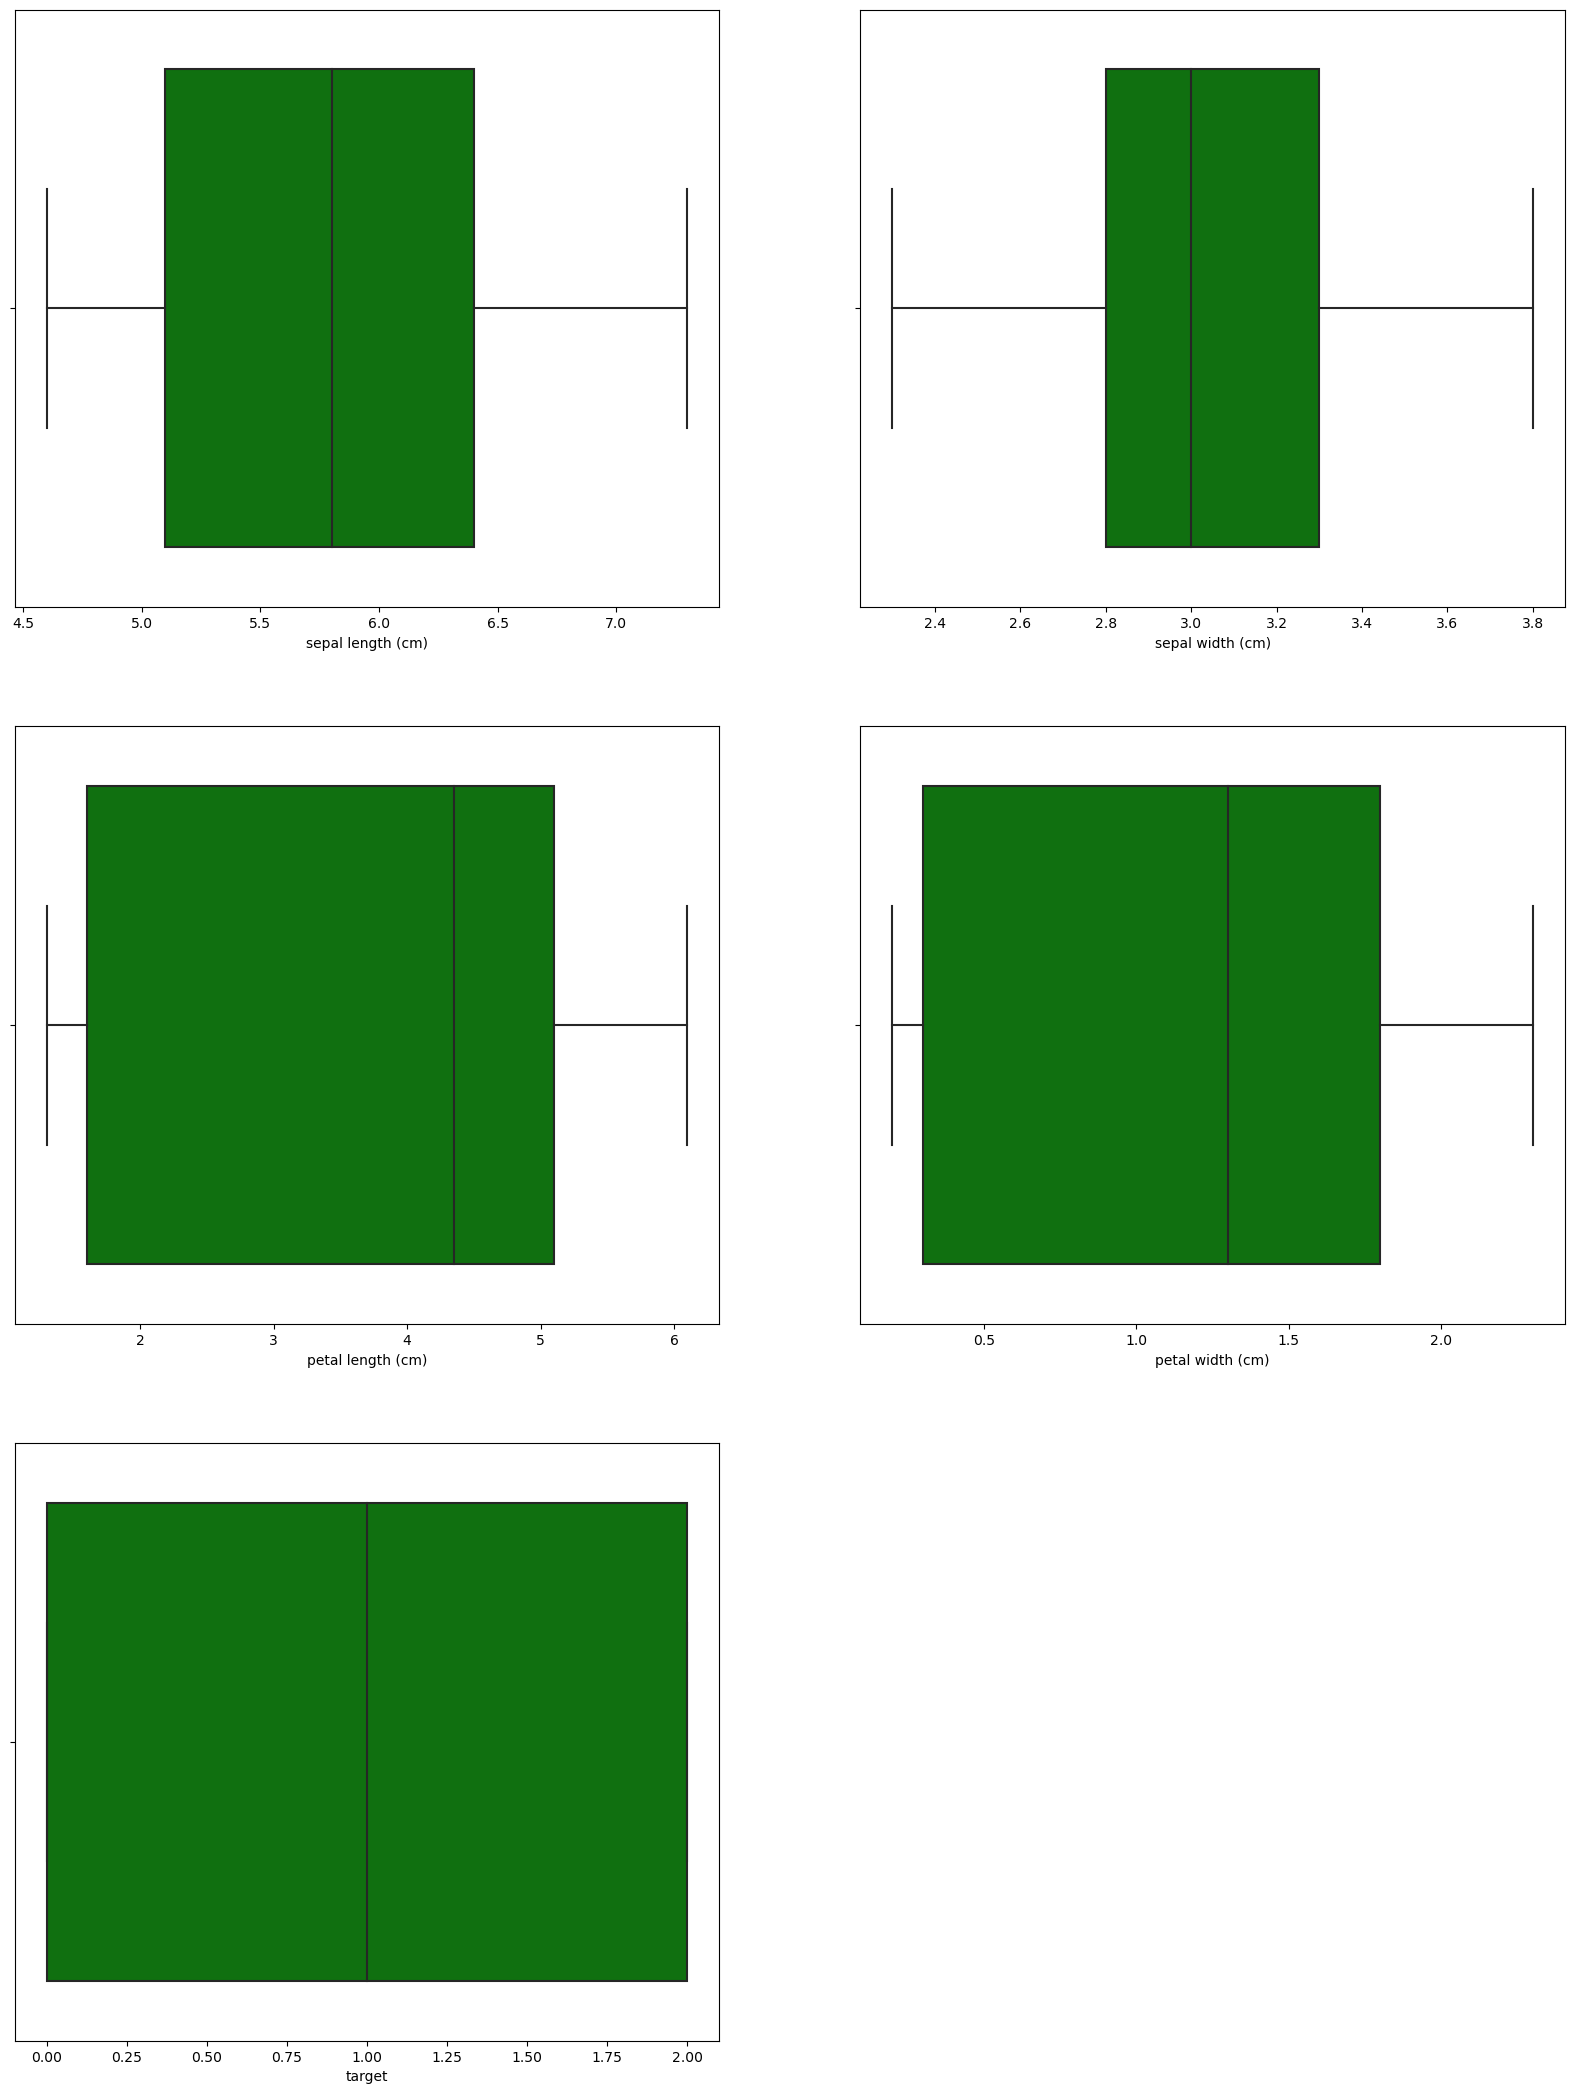

In [10]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = winsored_df, x = col, color = 'g')
plt.show()

In [11]:
pearson_coef_val = []
p_val = []

for col in winsored_df.columns:
    pearson_coef, p_value = stats.pearsonr(winsored_df[col], winsored_df['target'])
    pearson_coef_val.append(pearson_coef)
    p_val.append(round(p_value, 4))

In [12]:
is_significant = []

for i in p_val:
    if i> 0.1:
        is_significant.append('No')
    else:
        is_significant.append('Yes')
is_significant

['Yes', 'Yes', 'Yes', 'Yes', 'Yes']

In [13]:
data = {
    'Feature': winsored_df.columns,
    'Correlation Coefficient': pearson_coef_val,
    'is_significant': is_significant
}

df_sig = pd.DataFrame(data)
df_sig

,Feature,Correlation Coefficient,is_significant
0,sepal length (cm),0.792457,Yes
1,sepal width (cm),-0.425954,Yes
2,petal length (cm),0.951983,Yes
3,petal width (cm),0.959293,Yes
4,target,1.000000,Yes


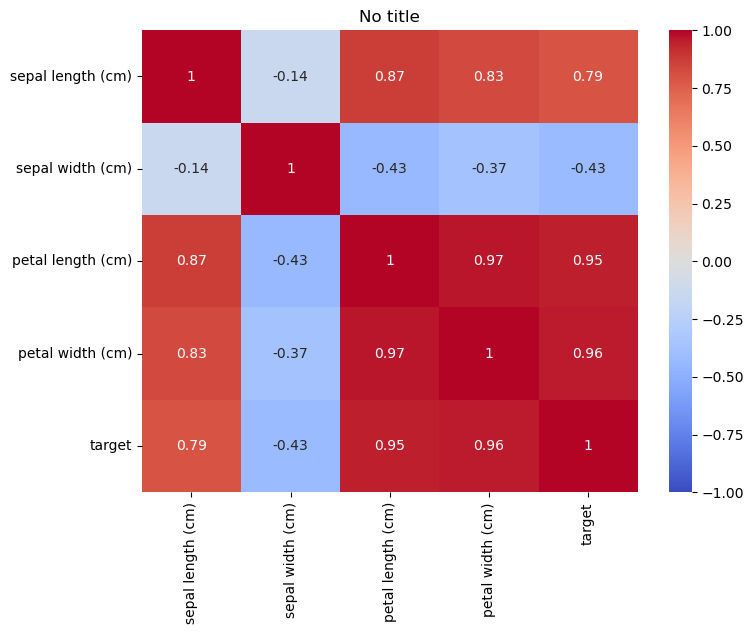

In [14]:
corr_matrix = winsored_df.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('No title')
plt.show()

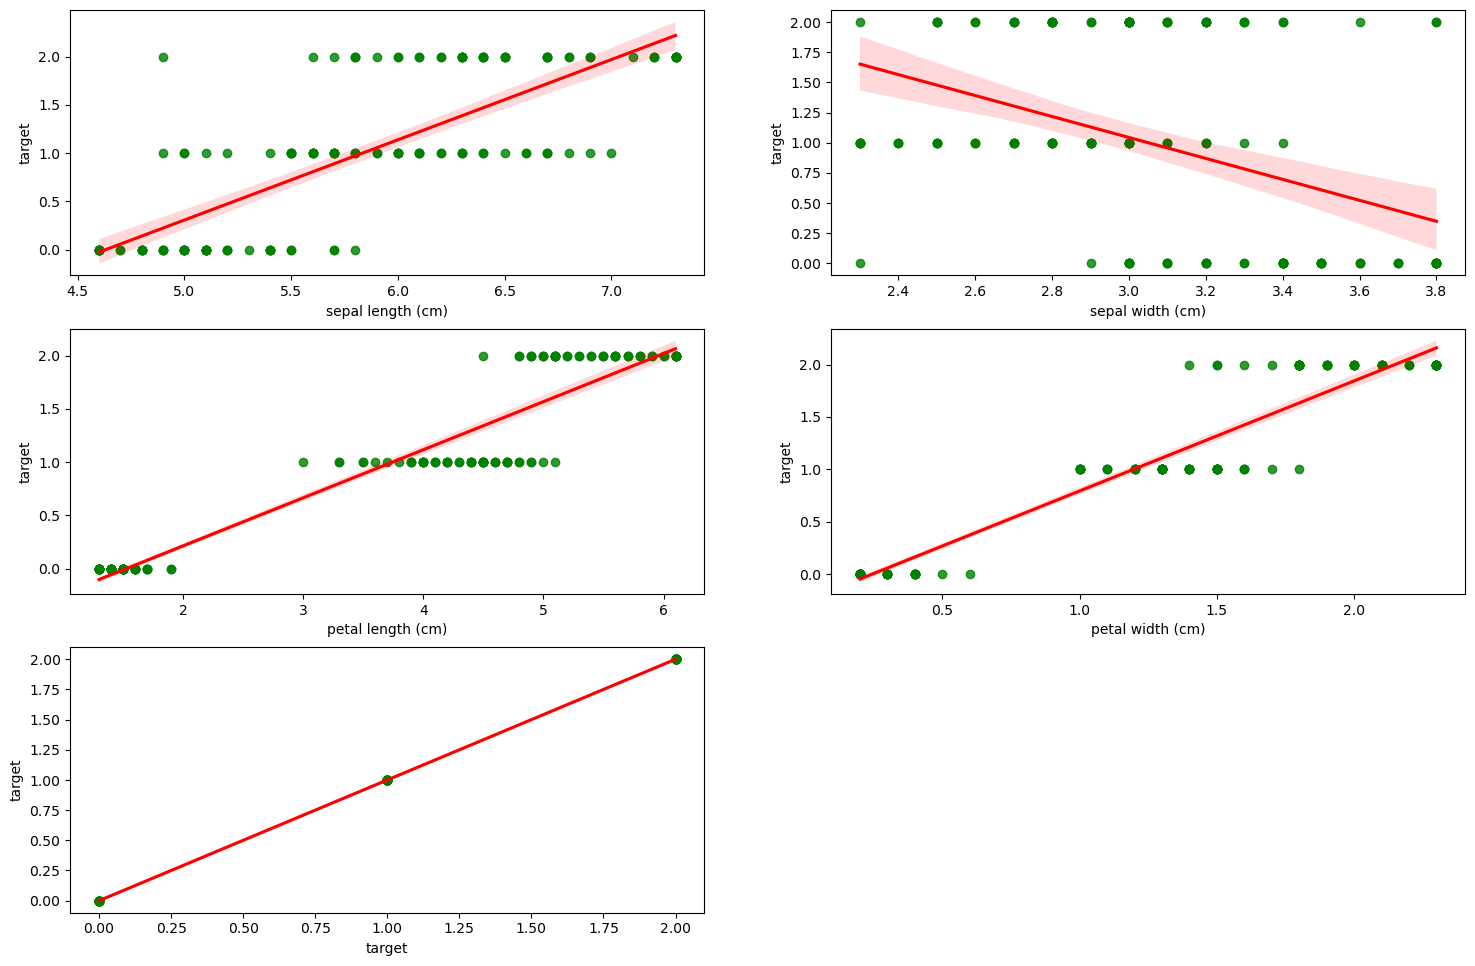

In [15]:
plt.figure(figsize = (18, 20))
for i, col in enumerate(winsored_df.columns):
    plt.subplot(5, 2, i+1)
    sns.regplot(data = winsored_df, x = col, y = 'target', color = 'g', line_kws = {'color':'red'})
plt.show()

In [16]:
winsored_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
z_scores = zscore(winsored_df)
outliers = (np.abs(z_scores)>3)
outliers.sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
X = winsored_df.drop('target' , axis = 1)
y = winsored_df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [23]:
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy : {accuracy}%")

Accuracy : 96.66666666666667%
